In [39]:
import os
import sys

from matplotlib import pyplot as plt
from segformer_segmentation_head_study import plot_segmentation_head
from mIoU_vs_models import plot_mIoU_vs_models, plot_sample_images, crop_image
from epoch_time_vs_params import plot_epoch_time
from utils.vis_utils import visualize_grid, plot_pil_images
import numpy as np
from PIL import Image

BASELINE = os.path.dirname(os.getcwd())

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Segformer head comparison

0.567 (1x1 conv), 0.566 (double 3x3), 0.571 (3x3 conv)


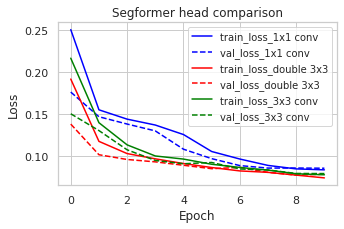

In [7]:
plot_segmentation_head()

# mIoU vs models

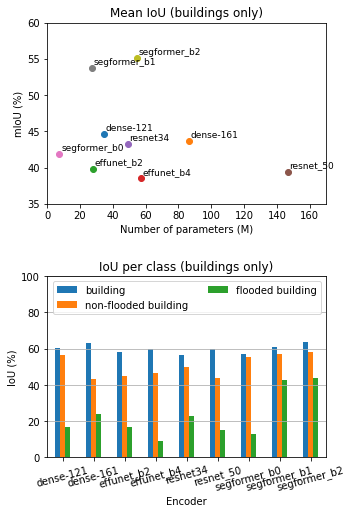

In [62]:
result, sample_foundation_images, sample_flood_images = plot_mIoU_vs_models()

Show flood predictions:

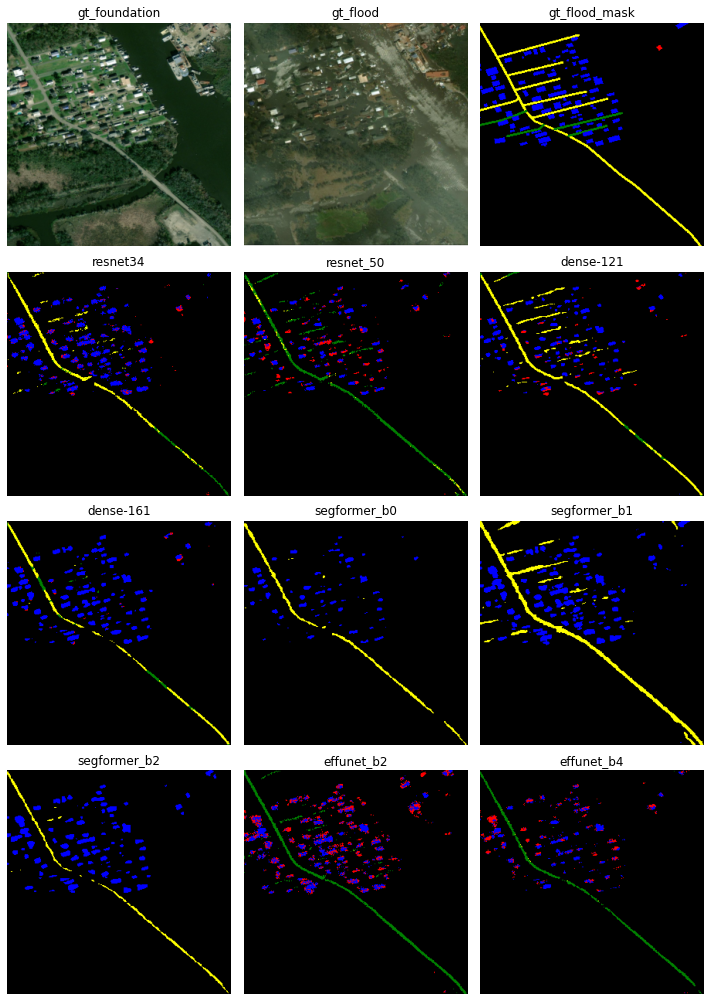

In [63]:
# crop images
gt_foundation = crop_image(sample_flood_images['resnet34'], (144, 92))
gt_flood = crop_image(sample_flood_images['resnet34'], (144, 387))
gt_flood_mask = crop_image(sample_flood_images['resnet34'], (440, 93))
images = {}
for key in sample_flood_images:
    images[key] = crop_image(sample_flood_images[key], (732, 94)) 
    
# show them in a grid
limages = [gt_foundation, gt_flood, gt_flood_mask] + [images[key] for key in images]
ltitles = ['gt_foundation', 'gt_flood', 'gt_flood_mask'] + list(images.keys())
plot_pil_images(limages, ltitles, 3, figsize=(10,14), save_path=os.path.join(BASELINE, f'results/sample_images_flood.png'))

Show foundation predictions:

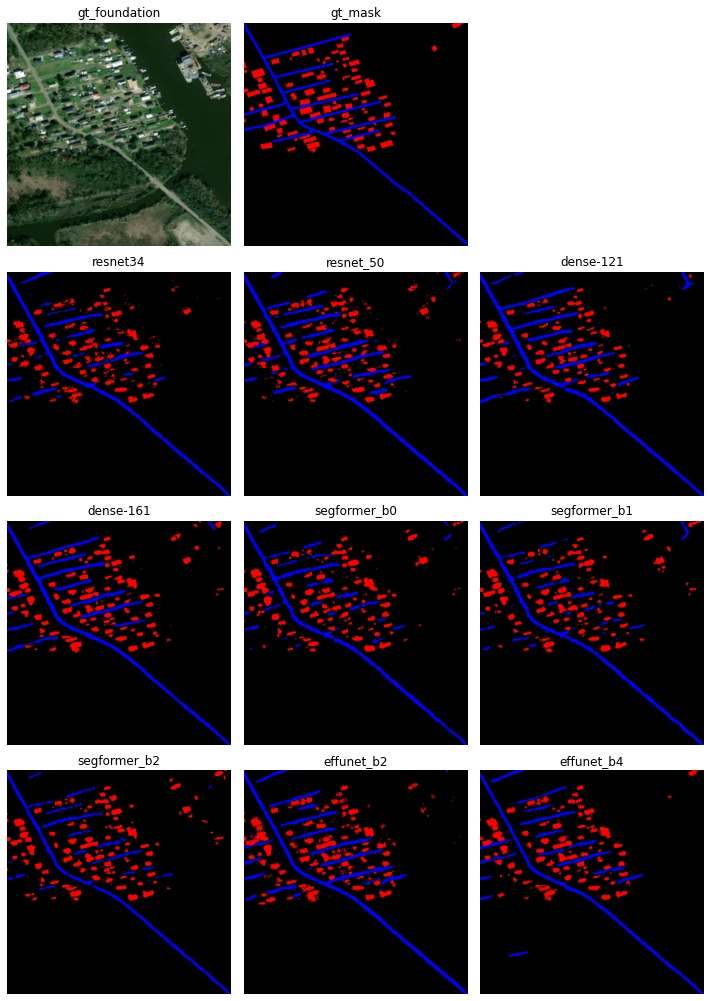

In [64]:
# crop images
gt_foundation = crop_image(sample_foundation_images['resnet34'], (251, 50))
gt_foundation_mask = crop_image(sample_foundation_images['resnet34'], (561, 51))
images = {}
for key in sample_flood_images:
    images[key] = crop_image(sample_foundation_images[key], (872, 50)) 
    
# show them in a grid
limages = [gt_foundation, gt_foundation_mask, Image.new('RGB', (100, 100), color='white')] + [images[key] for key in images]
ltitles = ['gt_foundation', 'gt_mask', ''] + list(images.keys())
plot_pil_images(limages, ltitles, 3, figsize=(10,14), save_path=os.path.join(BASELINE, f'results/sample_images_foundation.png'))

# Epoch time

Created file.


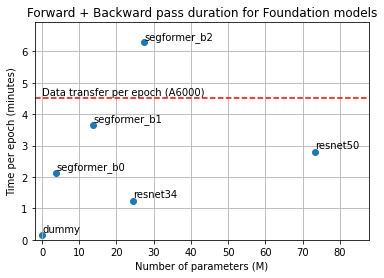

In [68]:
# plot_epoch_time('/tmp/share/runs/spacenet8/nenad/2023-06-07-21-47_epoch_time', label='epoch_time', tag='short')  # 
# plot_epoch_time('/tmp/share/runs/spacenet8/nenad/2023-06-05-18-49_epoch_time', label='3epochs')  # latest run: '/tmp/share/runs/spacenet8/nenad/2023-06-05-18-49_epoch_time_vs_param')  # 
plot_epoch_time()